# Central Limit Demo
John Horel
ATMOS 5040/ Spring 2019
January 21 2019
ATMOS 5040: Environmental Statistics
John Horel

Download this notebook and all images and data by downloading the ZIP file from GitHub, or use the git command:

git clone https://github.com/johnhorel/ATMOS_5040_2019.git
Note: Windows users will have to install git for Windows and execute the git command from the PowerShell.

In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
sides = input('enter the number of sides on the die (6 or 10 or...): ')
dice = input('enter the sample size (number of dice to roll at the same time): ')
rolls = input('enter the number of rolls: ')
sides = int(sides)
dice = int(dice)
rolls = int(rolls)

enter the number of sides on the die (6 or 10 or...): 3
enter the sample size (number of dice to roll at the same time): 10
enter the number of rolls: 100


In [24]:
rd = np.random.random_sample((rolls,dice))
#print(rd)

In [25]:
rdd = np.ceil(sides*rd)
#print(rdd)

In [26]:
#define the population as all the possible rolls
pop = rdd.flatten();
#compute std of population
pstd = np.std(pop,ddof=1);

In [27]:
#compute the sum and mean of the samples
if dice>1:
    ss = np.sum(rdd,axis=1)
    sm = np.mean(rdd,axis=1)
else:
    ss = rdd
    sm = rdd 
    
mean_sum = np.mean(ss)
mean_mean = np.mean(sm)
print(mean_sum, mean_mean)

#compute the std of the sample means 
sstd = np.std(sm,ddof=0);
%does the central limit theorem work? is the following close to sstd?
check = pstd/np.sqrt(dice);
print("population standrd deviation= %.1f" % pstd)
print("standard deviation of sample means= %.1f" % sstd)
print("check for central limit theorem= %.1f" % check)


20.67 2.0669999999999997
population standrd deviation= 0.8
standard deviation of sample means= 0.3
check for central limit theorem= 0.3


In [ ]:
%does the central limit theorem work? is the following close to sstd

[Text(0.5,1,'Sample Means')]

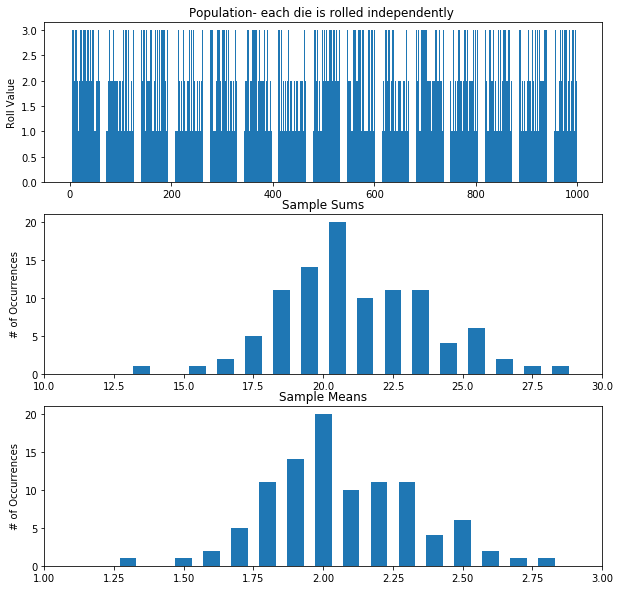

In [28]:
fig,(ax1,ax2,ax3) = plt.subplots(3,1,figsize=(10,10))
x = np.arange(0,rolls*dice)
ax1.bar(x,pop)
ax1.set(xlabel="",ylabel='Roll Value')
ax1.set(title='Population- each die is rolled independently ')
x2 = np.arange(1,sides*dice)
hist_val,bins = np.histogram(ss,x2)
width = 0.6 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
ax2.bar(center,hist_val,align='center',width=width)
ax2.set(xlim=(dice,sides*dice))
ax2.set(xlabel="",ylabel='# of Occurrences')
ax2.set(title='Sample Sums')

x3 = np.arange(1-.5*1/dice,sides+.5*1/dice,1/dice);
hist_val,bins = np.histogram(sm,x3)
width = 0.6 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
ax3.bar(center,hist_val,align='center',width=width)
ax3.set(xlim=(1,sides))
ax3.set(xlabel="",ylabel='# of Occurrences')
ax3.set(title='Sample Means')